# Simulación de acciones#

## Rendimientos en empresas tecnológicas (NASDAQ)##

### Objetivo general##

Nuestro proyecto consiste en realizar simulaciones sobre 4 empresas tecnológicas que cotizan en la bolsa, propiamente del grupo (NASDAQ), con el fin de observar cuales son las probabilidades de maximización de ganancias mediante la simulación Montecarlo.
Nuestras empresas son: Microsoft, Apple, Intel Corporation, Nvidia

Mediante simulación Montecarlo y graficando las simulaciones realizaremos nuestras predicciones con las cuales prodemos visualizar, analizar y concluir las probabilidades que hay de que suba un 10% la acción de cada empresa, todo esto con el fin de saber si debemos comprar o vender, realizar una buena inversión y maximizar las ganancias y recursos.

### Objetivos especificos###


- Realizar la Simulación de las acciones de la empresa Microsoft.
- Realizar la Simulación de las acciones de la empresa Apple.
- Realizar la Simulación de las acciones de la empresa Intel Corporation.
- Realizar la Simulación de las acciones de la empresa Nvidia.
- Realizar una correcta predicción de que suban las acciones el 10% de su valor.

### Importar librerias correspondientes###

In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd

Se importaron las librerías pandas_datareader.data para importar los datos de las acciones de las empresas que se van a estar simulando, librería matplotlib.pyplot para graficar, librería random, numpy y pandas para las tablas donde se mostrarán los datos.

### Importar los datos de yahoo finance###


In [2]:
def get_closes(names, start_date, end_date):
    closes = web.DataReader(name=names,
                           data_source="yahoo",
                           start=start_date,
                           end=end_date)
    return closes['Adj Close']

Se define función get_closes para importar los ajustes de cierre de las 4 empresas de tecnología (NASDAQ), que elegimos que son Microsoft, Apple, Intel Corporation y Nvidia.

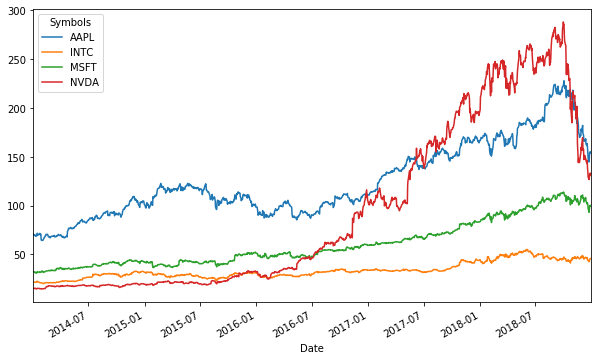

In [3]:
names = ['MSFT','AAPL','INTC','NVDA']
start, end = '2014-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

Gráfica que muestra las fluctuaciones en los precios de las empresas desde el primero de enero del 2014 hasta el 31 de diciembre del 2018.

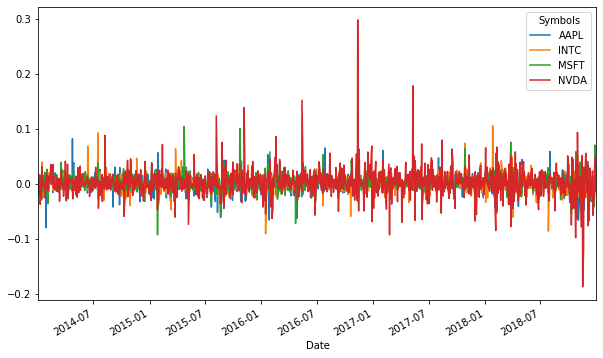

In [4]:
ret = closes.pct_change().dropna()
ret.plot(figsize=(10,6));

Gráfica de los rendimientos de cada empresa.

### Rendimientos###

Para calcular los rendimientos que habrá en un futuro se hace por medio de la fórmula de densidad de la distribución normal que es:

$$\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Donde $\sigma$ es la desviación estándar, $\mu$ es la media muestral y $x$ es nuestra variable. Se usarán 4 $\sigma$ y 4 $\mu$ diferentes, cada una con su respectiva compañía.

#### Media de cada empresa####

In [5]:
mu_M, mu_S,mu_N,mu_E = ret.mean()["MSFT"], ret.mean()["AAPL"], ret.mean()["INTC"], ret.mean()["NVDA"]
mu_M, mu_S,mu_N,mu_E

(0.001002030225885538,
 0.000735737372517043,
 0.00071288822138129,
 0.002052574707841906)

#### Sigma de cada empresa####

In [6]:
s_M, s_A,s_I,s_N = ret.std()["MSFT"], ret.std()["AAPL"], ret.std()["INTC"], ret.std()["NVDA"]
s_M, s_A,s_I,s_N

(0.014595261779746323,
 0.01507110097599108,
 0.01552837610169047,
 0.025378674676238135)

#### Ret_sim####

In [7]:
def ret_sim(mu, sigma, ndays, nscen, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(data = sigma*np.random.randn(ndays, nscen)+mu, index = dates)

Se define la función ret_sim que nos sirve para simular escenarios de rendimientos obtenidos de las empresas.

In [8]:
simret_M = ret_sim(mu_M, s_M, 365, 1000, '2019-01-01')
simret_A = ret_sim(mu_S, s_A, 365, 1000, '2019-01-01')
simret_I = ret_sim(mu_N, s_I, 365, 1000, '2019-01-01')
simret_N = ret_sim(mu_E, s_N, 365, 1000, '2019-01-01')

Se obtienen 1000 escenarios de simulaciones de las empresas en el
plazo de 1 año.

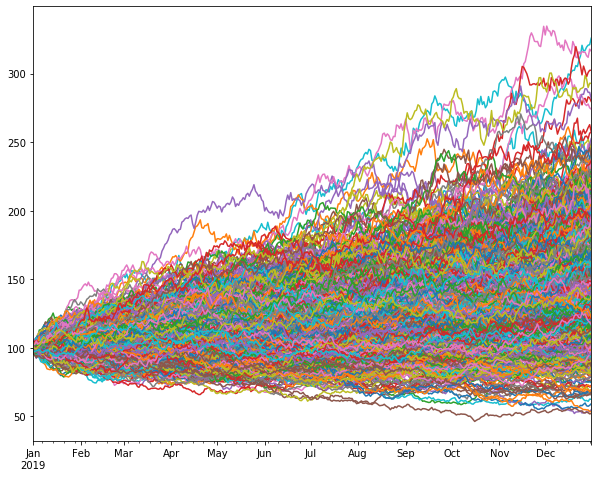

In [9]:
simcloses_M = closes.iloc[-1].MSFT*((1+simret_M).cumprod())
simcloses_A = closes.iloc[-1].AAPL*((1+simret_A).cumprod())
simcloses_I = closes.iloc[-1].INTC*((1+simret_I).cumprod())
simcloses_N = closes.iloc[-1].NVDA*((1+simret_N).cumprod())
simcloses_M.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Microsoft

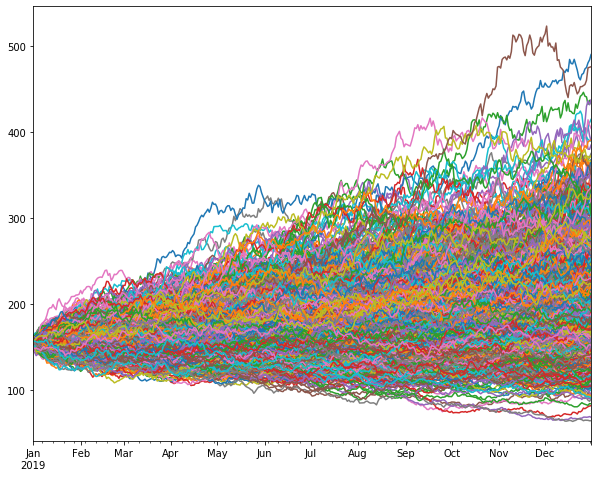

In [10]:
simcloses_A.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Apple

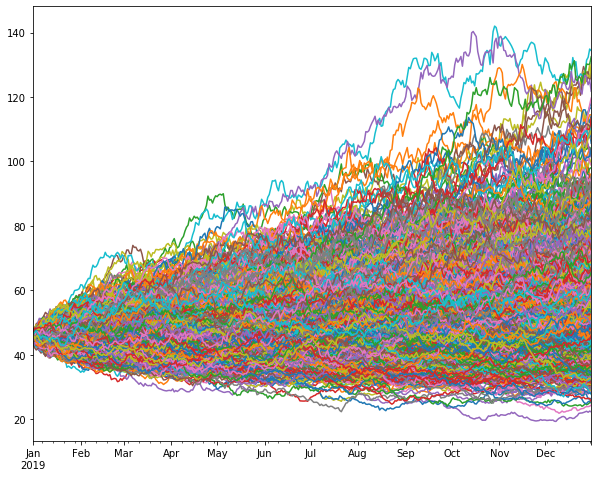

In [11]:
simcloses_I.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Intel Corporation

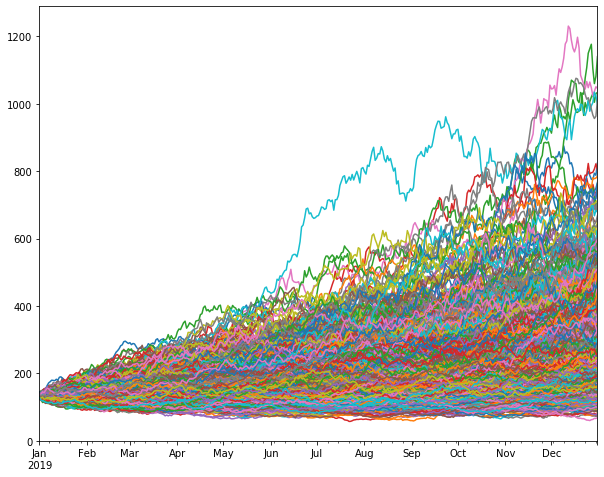

In [12]:
simcloses_N.plot(figsize=(10,8),legend=False);

Simulación de 1000 escenarios para Nvdia

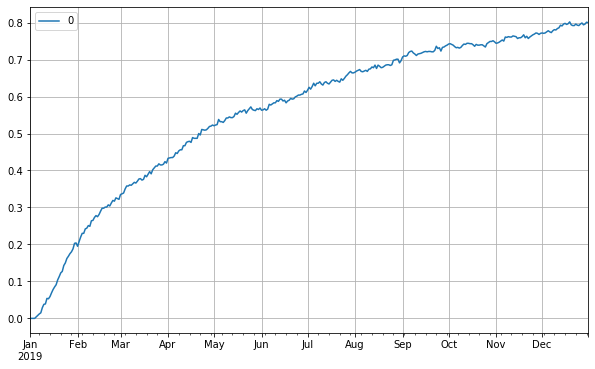

In [13]:
K_M = (1+0.10)*closes.iloc[-1].MSFT
prob = pd.DataFrame((simcloses_M>K_M).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de Microsoft a una tasa de interés anual del 10%.  
De Enero a Marzo hay una probabilidad de aproximadamente 37% de que se llegue al precio umbral.  
De Abril a Junio hay 60% aproximadamente  
De Julio a Septiembre hay 70% aproximadamente  
Y de Octubre a Diciembre hay 80% de probabilidades que cruce el umbral.
Esta sin duda es la mejor opción. 

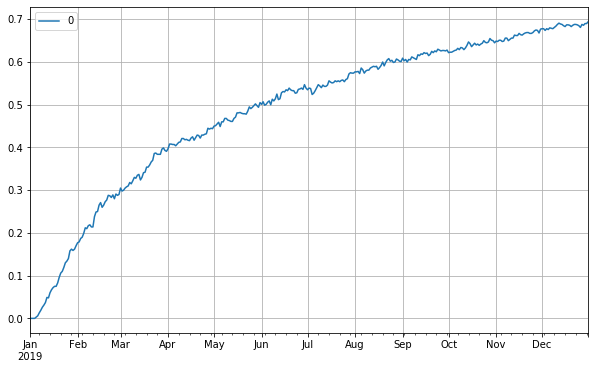

In [18]:
K_A = (1+0.10)*closes.iloc[-1].AAPL
prob = pd.DataFrame((simcloses_A>K_A).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de Apple a una tasa de interés anual del 10%.  
De Enero a Marzo hay una probabilidad de aproximadamente 40% de que se llegue al precio umbral.  
De Abril a Junio hay 50% aproximadamente  
De Julio a Septiembre hay 60% aproximadamente  
Y de Octubre a Diciembre hay 77% de probabilidades que cruce el umbral

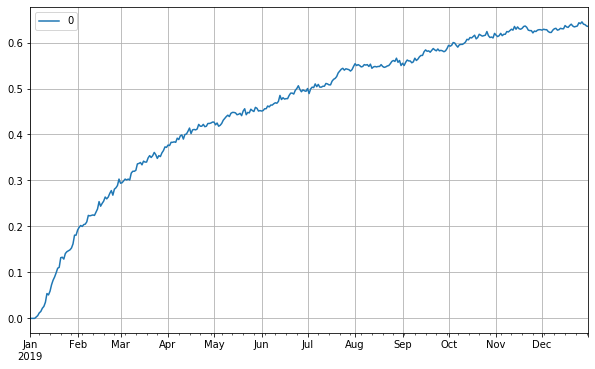

In [19]:
K_I = (1+0.10)*closes.iloc[-1].INTC
prob = pd.DataFrame((simcloses_I>K_I).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de Intel Corporation a una tasa de interés anual del 10%.  
De Enero a Marzo hay una probabilidad de aproximadamente 30% de que se llegue al precio umbral.  
De Abril a Junio hay 45% aproximadamente  
De Julio a Septiembre hay 54% aproximadamente  
Y de Octubre a Diciembre hay 67% de probabilidades que cruce el umbral.
Podemos observar que las acciones van en aumento, en conlusión es una buena opción de compra. 

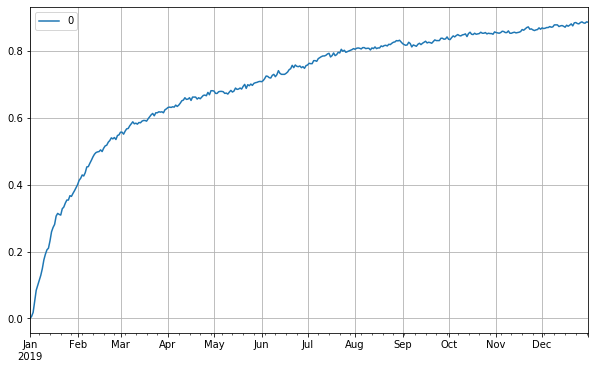

In [20]:
K_N = (1+0.10)*closes.iloc[-1].NVDA
prob = pd.DataFrame((simcloses_N>K_N).sum(axis=1)/1000)
prob.plot(figsize=(10,6), grid=True);

Gráfica de probabilidad de NVIDIA a una tasa de interés anual del 10%.  
De Enero a Marzo hay una probabilidad de aproximadamente 57% de que se llegue al precio umbral.  
De Abril a Junio hay 70% aproximadamente  
De Julio a Septiembre hay 80% aproximadamente  
Y de Octubre a Diciembre hay 86% de probabilidades que cruce el umbral

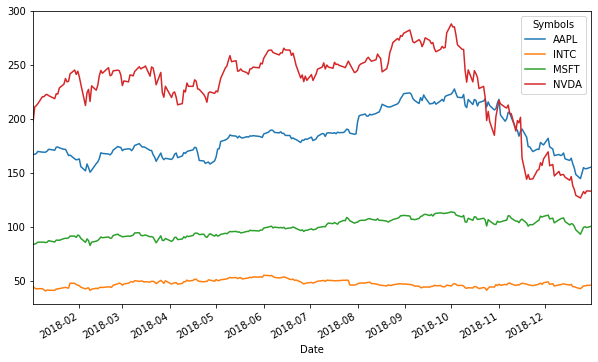

In [22]:
names = ['MSFT','AAPL','INTC','NVDA']
start, end = '2018-01-01', '2018-12-31'
closes = get_closes(names=names, start_date=start, end_date=end)
closes.plot(figsize=(10,6));

Esta gráfica muestra los datos reales del año 2018 de las 4 empresas que estamos simulando

In [24]:
i = np.arange(4)
i=i+1
df = pd.DataFrame(index=i,columns=['Microsoft', 'APPLE', 'INTEL', 'NVIDIA'], dtype='float')
df.index.name = "$Trimestre$"


df['Microsoft'] = [0.37, 0.60, 0.70, 0.80]
df['APPLE'] = [0.40, 0.50, 0.60, 0.77]
df['INTEL'] = [0.30, 0.45, 0.54, 0.67]
df['NVIDIA'] = [0.57, 0.70, 0.80, 0.86]
print("Probabilidad de que cruce el precio Umbral:")
df.round(2)

Probabilidad de que cruce el precio Umbral:


Microsoft  APPLE  INTEL  NVIDIA
$Trimestre$                                 
1                 0.37   0.40   0.30    0.57
2                 0.60   0.50   0.45    0.70
3                 0.70   0.60   0.54    0.80
4                 0.80   0.77   0.67    0.86

In [26]:
K_M,K_A,K_I,K_N
print("El precio meta para Microsoft es",K_M)
print("El precio meta para Apple es",K_A)
print("El precio meta para Intel es",K_I)
print("El precio meta para Nvidia es",K_N)

El precio meta para Microsoft es 110.47370529174806
El precio meta para Apple es 170.94554901123047
El precio meta para Intel es 50.366466522216804
El precio meta para Nvidia es 146.38665924072268


. Para Microsoft no se pudo superar en el primer trimestre pero en el segundo, tercero y cuarto si se supera el precio esperado.

. Para Apple se pudo mantener en su precio por arriba durante los primeros 3 trimestres pero en el ultimo ya no lo pudo sostener y cayó el valor de la acción  

. Para Intel Corporation se supero el segundo semestre pero tanto como el primero como el tercero y cuarto el precio de la acción ya no fue sostenible. 

. Para Nvidia tuvo uno de los mejores años en su valuación de los primeros 3 trimestres ya que el precio de la acción estuvo muy por encima de lo que se esperaba que estuviera, excepto en el cuarto trimestre donde la acción cayó demasiado su valor.
Nosotros en resumen invertiríamos en Microsoft, ya que el p

### Conclusión
Al realizar las predicciones de las distintas empresas sobre la rama tecnológica, especificamente en empresas que estuvieran en el NASDAQ y al analizar la manera en cómo se comportan las acciones de cada empresa, pudimos  determinar sus probabilidades en base a diferentes tasas de interés, así como simular diferentes escenarios para las distintas empresas.

Esto con el fin de poder predecir cual iba a ser la forma en la que las acciones se iban a comportar, esto es fundamental en nuestra carrera ya que el saber como van a abrir las acciones y como van a cerrar es crucial en lo que podría ser tener utilidades en bolsa como perder grandes sumas por no saber cual será el precio, en estos casos una de las mejores inversiones pudo haber sido Nvidia ya que si la hubieramos comprado desde el año 2017 y la hubieramos mantenido esta en 3 trimestres pudo habernos dado excelentes rendimientos pero teniendo en cuenta que para el último trimestre habría que venderla porque el precio se desplomaría.

Este tipo de simulación es bastante útil en nuestra carrera (ingeniería financiera), ya que, nos ayuda a predecir u obtener diferentes probabilidades de lo que pueda llegar a pasar en un futuro en base a cualquier acción que cotice en la bolsa, es una herramienta indispensable para un análisis en el cuál se busca generar la máxima utilidad.

Aplicando esto a la ingeiería civil, es importante saberlo porque si la acción tiene más rentabilidad, podríamos conseguir un cliente potencial para poder tener un buen negocio y tener la seguridad de que el negocio será rentable y hay fondos suficientes para cubrir la cuota.